In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx
from scipy.sparse.csgraph import laplacian
import sympy as sym

In [3]:
x = sym.symbols('x')


In [58]:
##KAGOME 

n = 7
Am_size = 5*n+1
Am = sym.zeros(Am_size,Am_size)

middle = False
j = 0
while j<Am_size:
    i = 0
    while i<Am_size:
        if i in [0,1,3] and j in [0,1,3]:
            if abs(i-j) == 3:
                Am[i,j] = 1
            elif abs(i-j) == 1:
                Am[i,j] = 1
        elif i in [5*n,5*n-1,5*n-3] and j in [5*n,5*n-1,5*n-3]:
            if abs(i-j) == 3:
                Am[i,j] = 1
            elif abs(i-j) == 1:
                Am[i,j] = 1
        elif ((i%5 == 0 or j%5 == 0) and (i!=5*n and j!=5*n) and  (i!=0 and j!=0)):
            if i%5 == 0:
                m = int(i/5)
            elif j%5 ==0:
                m = int(j/5)
            Am[5*m - 4, 5*m -3] = x
            Am[5*m - 3, 5*m -4] = x
            
            Am[5*m - 3, 5*m +1] = 1
            Am[5*m +1, 5*m -3] = 1
            
            Am[5*m+1, 5*m+2] = 1
            Am[5*m+2, 5*m+1] = 1
            
            Am[5*m-1, 5*m+3] = x
            Am[5*m+3, 5*m-1] = x
            
            Am[5*m-1, 5*m -2] = 1
            Am[5*m-2, 5*m -1] = 1
            
            Am[5*m + 3, 5*m +4] =1
            Am[5*m + 4, 5*m +3] =1
            
            if abs(i-j) in [1,3]:
                Am[i,j] = 1
        i = i+1
    j = j+1
            


In [59]:
## COMPUTING LAPLACIAN
Laplacian = Am
s = 0
while s<Am_size:
    r = 0
    sum_of_col = 0
    while r<Am_size:
        if s!=r:
            sum_of_col = sum_of_col + Laplacian[s,r]
            Laplacian[s,r] = -Laplacian[s,r]
        r=r+1
    Laplacian[s,s] = sum_of_col
    s =s+1
        
    

In [60]:
Laplacian.col_del(1)
Laplacian.row_del(1)

In [61]:
n3 = Laplacian.det()

In [62]:
n3

285093750*x**12 + 1762565625*x**11 + 4747771875*x**10 + 7364555625*x**9 + 7325524125*x**8 + 4924295130*x**7 + 2296134516*x**6 + 749728854*x**5 + 170604714*x**4 + 26474949*x**3 + 2669193*x**2 + 157545*x + 4131

In [57]:
n2 = Laplacian.det()

In [22]:
n2

15278125*x**10 + 78168750*x**9 + 169342500*x**8 + 204428500*x**7 + 152277225*x**6 + 73200264*x**5 + 23053975*x**4 + 4717284*x**3 + 603342*x**2 + 43794*x + 1377

In [24]:
quo, rem = sym.div(n2,n3, domain = 'RR')

In [25]:
quo

18.6603053435114*x**2 + 19.8919235475788*x + 2.15110325160326

In [26]:
rem

705058.304751645*x**7 + 2101541.8858978*x**6 + 2475576.95362105*x**5 + 1496181.39199429*x**4 + 503477.768824573*x**3 + 95350.2700521807*x**2 + 9515.05897716762*x + 389.643607514104

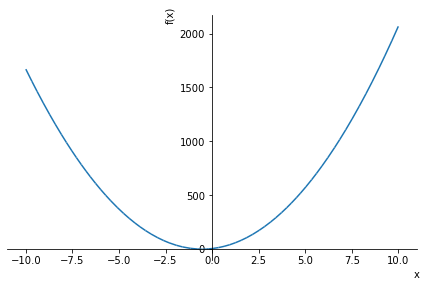

In [27]:
p1 = sym.plot(quo)

In [28]:
quo.subs(x,1)

40.7033321426935

In [29]:
rem.subs(x,1)

7387091.27772622

In [30]:
divn = n3/n2

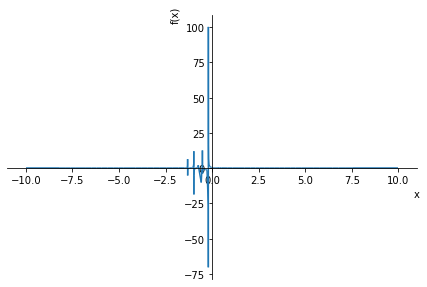

In [31]:
p2 = sym.plot(divn)

In [159]:
result = divn.subs(x,-0.23)

In [160]:
float(result)

-0.39111747851002865

In [135]:
sym.solve(divn,x)

[CRootOf(13210079*x**11 + 123019309*x**10 + 513328791*x**9 + 1267114671*x**8 + 2056304637*x**7 + 2304191043*x**6 + 1819791036*x**5 + 1013330412*x**4 + 390031767*x**3 + 98867709*x**2 + 14860665*x + 1003833, 0),
 CRootOf(13210079*x**11 + 123019309*x**10 + 513328791*x**9 + 1267114671*x**8 + 2056304637*x**7 + 2304191043*x**6 + 1819791036*x**5 + 1013330412*x**4 + 390031767*x**3 + 98867709*x**2 + 14860665*x + 1003833, 1),
 CRootOf(13210079*x**11 + 123019309*x**10 + 513328791*x**9 + 1267114671*x**8 + 2056304637*x**7 + 2304191043*x**6 + 1819791036*x**5 + 1013330412*x**4 + 390031767*x**3 + 98867709*x**2 + 14860665*x + 1003833, 2),
 CRootOf(13210079*x**11 + 123019309*x**10 + 513328791*x**9 + 1267114671*x**8 + 2056304637*x**7 + 2304191043*x**6 + 1819791036*x**5 + 1013330412*x**4 + 390031767*x**3 + 98867709*x**2 + 14860665*x + 1003833, 3),
 CRootOf(13210079*x**11 + 123019309*x**10 + 513328791*x**9 + 1267114671*x**8 + 2056304637*x**7 + 2304191043*x**6 + 1819791036*x**5 + 1013330412*x**4 + 390031767